# **Text Classification (ML Approach)**
---


### 🧑‍💼 **Shuvendu Pritam Das**  
*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  
---

# Text Classification
1. Filtering
2. Customer Support
3. Sentiment
4. Language Detection
5. Fake Detection
6. Vulgarity Detection

# Pipe Line
1. Data Acquisition
2. Text Preprocessing
3. Feature Extraction (Text Vectorization (OWE, BOW, N-GRAMS, TF-IDF, WORD2VEC))
4. Model Development(Naive Bayes, LSTM, Bert)
5. Evaluation (Accuracy, Precision, Recall, AUC)
5. Deployment and Monitoring

# Approaches
1. Heuristic Approaches
2. API Approaches
3. ML Approaches(BOG/N-GRAMS/TF-IDF --> NB/RF/SVM)
4. DL Approaches(BOW/N-GRAMS/TF-IDF --> RNN/LSTM/CNN/BERT)

# Heuristic Approach

## Data Acquisition

In [1]:
text = "I love the new restaurant! The food is super and the service is excellent and the ambience is the best.but the only problem is delay service"

## Data Preprocessing

In [2]:
## Lower casing
text = text.lower()

## HTML Reoval
import re
text = re.sub('<.*?>','',text)

## URL Removal
text = re.sub('https?://\S+|www\.\S+','',text)

## Punctuation Removal
import string
text = text.translate(str.maketrans('','',string.punctuation))
text

## Word Tokenize
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)

## Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['i', 'love', 'the', 'new', 'restaurant', 'the', 'food', 'is', 'super', 'and', 'the', 'service', 'is', 'excellent', 'and', 'the', 'ambience', 'is', 'the', 'bestbut', 'the', 'only', 'problem', 'is', 'delay', 'service']


## Text Vectorization

In [3]:
## No need to do in this case.

## Heuristic Approach

In [4]:
no_of_words = len(tokens)
no_of_good_words = 0
no_of_bad_words = 0
for word in tokens:
  if word in ['good','great','excellent','super','best','fast']:
    no_of_good_words += 1
  elif word in ['bad','terrible','boring','worst','delay']:
    no_of_bad_words += 1

print(no_of_words,no_of_good_words,no_of_bad_words)

26 2 1


In [5]:
if no_of_good_words > no_of_bad_words:
  print('Positive')
else:
  print('Negative')

Positive


# API Approach

In [6]:
## nlpcloud.io
## aws
## gcp (google cloud platform)

# ML Approach

## Data Acquision

In [7]:
# from Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download akash14/product-sentiment-classification

Dataset URL: https://www.kaggle.com/datasets/akash14/product-sentiment-classification
License(s): other
product-sentiment-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/product-sentiment-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### Importing Basic Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [10]:
data = pd.read_csv('/content/Participants_Data/Train.csv',encoding='utf-8')
data.head()

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2


### Data Exploration with EDA and Basic Data Preprocessing

In [11]:
data.shape

(6364, 4)

In [12]:
data.isnull().sum()

,0
Text_ID,0
Product_Description,0
Product_Type,0
Sentiment,0


In [13]:
data.duplicated().sum()

0

In [14]:
data['Text_ID'].duplicated().sum()

0

In [15]:
data['Product_Description'].duplicated().sum()

12

In [16]:
data[['Text_ID','Product_Description']].duplicated().sum()

0

In [17]:
data['Product_Type'].value_counts()
## Total 10 Different Products

,count
Product_Type,
9,4070
6,665
2,465
7,327
3,300
5,213
8,194
1,59
0,52


In [18]:
data['Sentiment'].value_counts()
## Total 4 Different Sentiments
'''0 - Cannot Say
1 - Negative
2 - Positive
3 - No Sentiment'''

'0 - Cannot Say\n1 - Negative\n2 - Positive\n3 - No Sentiment'

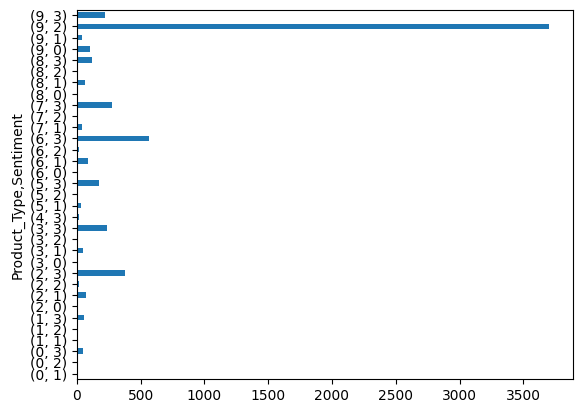

In [19]:
sentiment_distribtions = data.groupby(['Product_Type','Sentiment'])['Sentiment'].count()
sentiment_distribtions.plot(kind='barh')
plt.show()

## Text Preprocessing

In [20]:
!pip install emoji nltk textblob spacy

In [21]:
##  Lower Casing
data['Product_Description'] = data['Product_Description'].str.lower()

## HTML Tag Removal
import re
def remove_html_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'',text)

data['Product_Description'] = data['Product_Description'].apply(remove_html_tags)

## URL Removal
def remove_url(text):
  pattern = re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'',text)

data['Product_Description'] = data['Product_Description'].apply(remove_url)

## Punctuation Removal
import string
exclude = string.punctuation
def remove_punc(text):
  return text.translate(str.maketrans('','',exclude))

data['Product_Description'] = data['Product_Description'].apply(remove_punc)

## Stopwords Removal
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def remove_stopwords(text):
  return ' '.join([word for word in text.split() if word not in stop_words])

data['Product_Description'] = data['Product_Description'].apply(remove_stopwords)

## Emoji Replacement
import emoji
def convert_emojis(text):
  return emoji.demojize(text)

data['Product_Description'] = data['Product_Description'].apply(convert_emojis)
data.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,web designerûªs guide ios android apps today ...,9,2
1,6254,rt mention line ipad 2 longer today yesterday ...,9,2
2,8212,crazy apple opening temporary store austin tom...,9,2
3,4422,lesson google one pass digital environment use...,9,2
4,5526,rt mention panel quotyour mom ipad designing b...,9,2


In [22]:
x = data['Product_Description']
y = data['Sentiment']
x.shape,y.shape

((6364,), (6364,))

## Text Vectorization

### One Hot Encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
x_ohe = ohe.fit_transform(x.values.reshape(-1,1)).toarray()
x_ohe.shape

(6364, 6272)

### Bag of Words

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_bow = cv.fit_transform(x).toarray()
x_bow.shape

(6364, 9062)

### N-Grams

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2)) ##monograms + bi-grams
x_ngrams = cv.fit_transform(x).toarray()
x_ngrams.shape

(6364, 42043)

### Tf-Idf

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x).toarray()
x_tfidf.shape

(6364, 9062)

## Model Develpoment

In [27]:
from sklearn.model_selection import train_test_split
x_tf_idf_train,x_tf_idf_test,y_tf_idf_train,y_tf_idf_test = train_test_split(x_tfidf,y,test_size=0.2,random_state=42)
x_bow_train,x_bow_test,y_bow_train,y_bow_test = train_test_split(x_bow,y,test_size=0.2,random_state=42)
x_ngrams_train,x_ngrams_test,y_ngrams_train,y_ngrams_test = train_test_split(x_ngrams,y,test_size=0.2,random_state=42)
x_ohe_train,x_ohe_test,y_ohe_train,y_ohe_test = train_test_split(x_ohe,y,test_size=0.2,random_state=42)

In [28]:
x_tf_idf_train.shape,x_tf_idf_test.shape,y_tf_idf_train.shape,y_tf_idf_test.shape

((5091, 9062), (1273, 9062), (5091,), (1273,))

In [29]:
x_bow_train.shape,x_bow_test.shape,y_bow_train.shape,y_bow_test.shape

((5091, 9062), (1273, 9062), (5091,), (1273,))

In [30]:
x_ngrams_train.shape,x_ngrams_test.shape,y_ngrams_train.shape,y_ngrams_test.shape

((5091, 42043), (1273, 42043), (5091,), (1273,))

In [31]:
x_ohe_train.shape,x_ohe_test.shape,y_ohe_train.shape,y_ohe_test.shape

((5091, 6272), (1273, 6272), (5091,), (1273,))

### Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay

#### One Hot Encoded Data

0.605655930871956


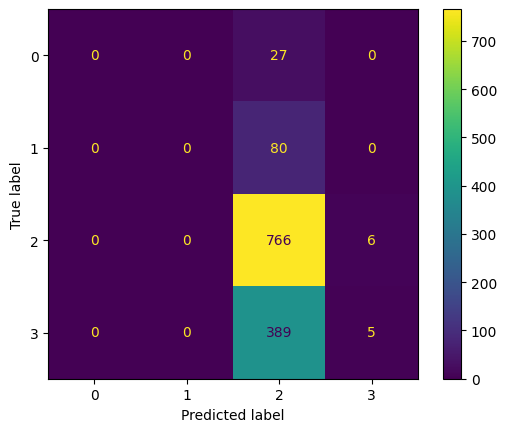

In [33]:
nb_ohe = MultinomialNB()
nb_ohe.fit(x_ohe_train,y_ohe_train)
y_pred_ohe = nb_ohe.predict(x_ohe_test)
print(accuracy_score(y_ohe_test,y_pred_ohe))
ConfusionMatrixDisplay(confusion_matrix(y_ohe_test,y_pred_ohe)).plot()

#### Bag of Words

0.6590730557737627


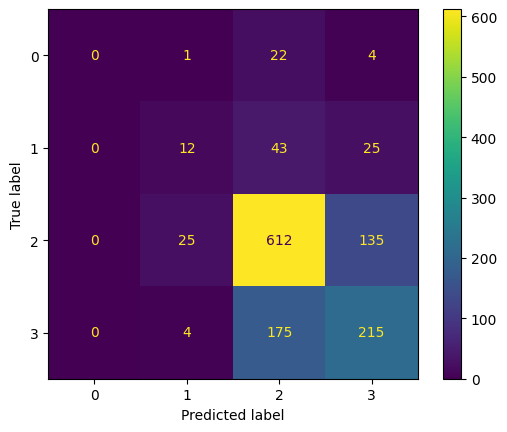

In [34]:
nb_bow = MultinomialNB()
nb_bow.fit(x_bow_train,y_bow_train)
y_pred_bow = nb_bow.predict(x_bow_test)
print(accuracy_score(y_bow_test,y_pred_bow))
ConfusionMatrixDisplay(confusion_matrix(y_bow_test,y_pred_bow)).plot()

#### N-Grams

0.6355066771406127


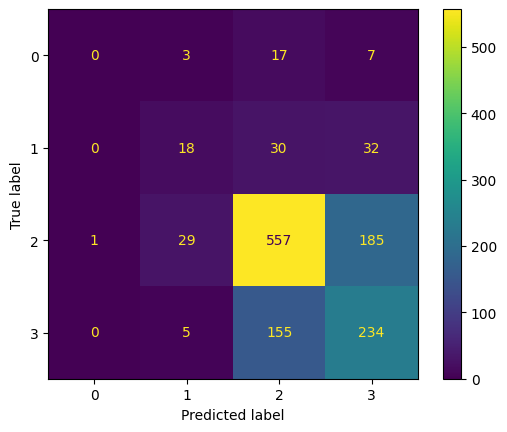

In [35]:
nb_ngrams = MultinomialNB()
nb_ngrams.fit(x_ngrams_train,y_ngrams_train)
y_pred_ngrams = nb_ngrams.predict(x_ngrams_test)
print(accuracy_score(y_ngrams_test,y_pred_ngrams))
ConfusionMatrixDisplay(confusion_matrix(y_ngrams_test,y_pred_ngrams)).plot()

#### Tf-Idf

0.6504320502749411


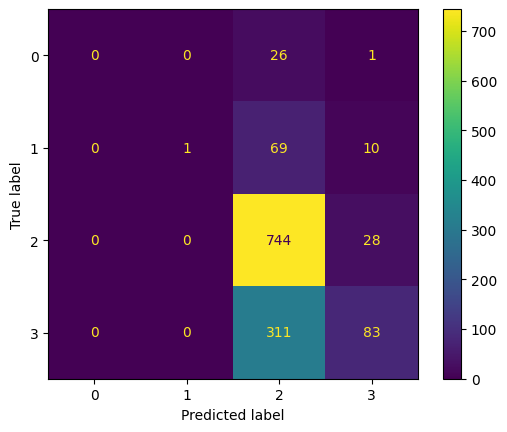

In [36]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(x_tf_idf_train,y_tf_idf_train)
y_pred_tfidf = nb_tfidf.predict(x_tf_idf_test)
print(accuracy_score(y_tf_idf_test,y_pred_tfidf))
ConfusionMatrixDisplay(confusion_matrix(y_tf_idf_test,y_pred_tfidf)).plot()

### Random Forest

#### One Hot Encoder

0.6048703849175177


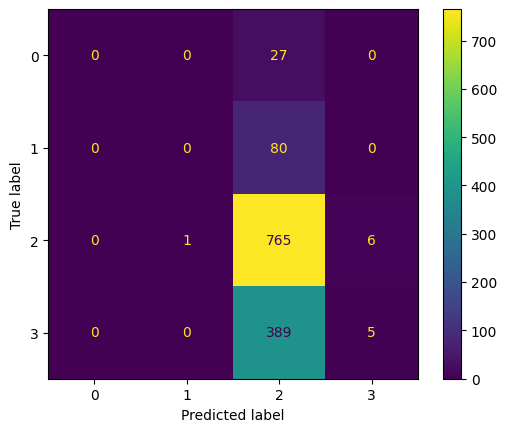

In [37]:
import sklearn.ensemble as ensemble
rf_ohe = ensemble.RandomForestClassifier()
rf_ohe.fit(x_ohe_train,y_ohe_train)
y_pred_ohe = rf_ohe.predict(x_ohe_test)
print(accuracy_score(y_ohe_test,y_pred_ohe))
ConfusionMatrixDisplay(confusion_matrix(y_ohe_test,y_pred_ohe)).plot()

#### Bag of Words

0.6787117046347211


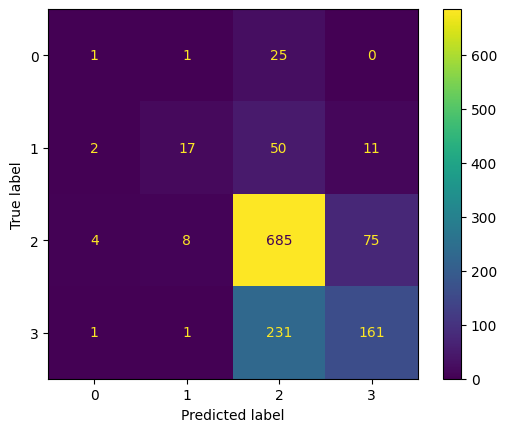

In [38]:
import sklearn.ensemble as ensemble
rf_bow = ensemble.RandomForestClassifier()
rf_bow.fit(x_bow_train,y_bow_train)
y_pred_bow = rf_bow.predict(x_bow_test)
print(accuracy_score(y_bow_test,y_pred_bow))
ConfusionMatrixDisplay(confusion_matrix(y_bow_test,y_pred_bow)).plot()

#### N-Grams

0.6598586017282011


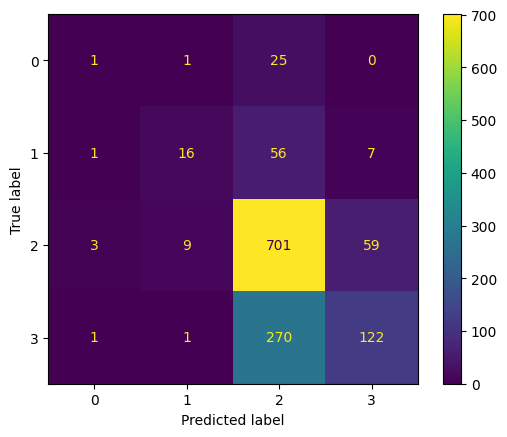

In [39]:
import sklearn.ensemble as ensemble
rf_ngrams = ensemble.RandomForestClassifier()
rf_ngrams.fit(x_ngrams_train,y_ngrams_train)
y_ngrams_pred = rf_ngrams.predict(x_ngrams_test)
print(accuracy_score(y_ngrams_test,y_ngrams_pred))
ConfusionMatrixDisplay(confusion_matrix(y_ngrams_test,y_ngrams_pred)).plot()

#### Tf-Idf

0.6739984289080911


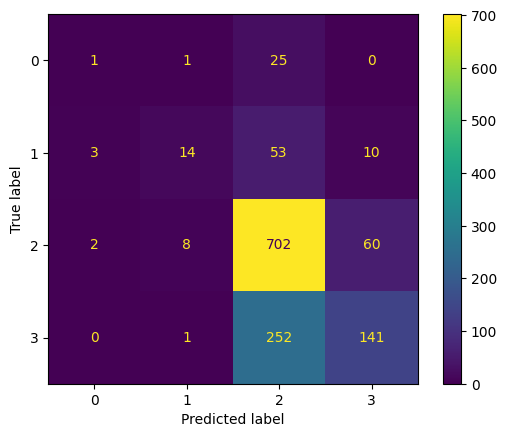

In [40]:
import sklearn.ensemble as ensemble
rf_tfidf = ensemble.RandomForestClassifier()
rf_tfidf.fit(x_tf_idf_train,y_tf_idf_train)
y_pred_tfidf = rf_tfidf.predict(x_tf_idf_test)
print(accuracy_score(y_tf_idf_test,y_pred_tfidf))
ConfusionMatrixDisplay(confusion_matrix(y_tf_idf_test,y_pred_tfidf)).plot()

### Accuracy Improvement
- Though we have tries different Vectorization Techniques with Different ML techniques, the accuracy is not more than 70% for any model.
- Method-1 : Use max_feature hyperparameter.

(6364, 3000)
0.6794972505891594


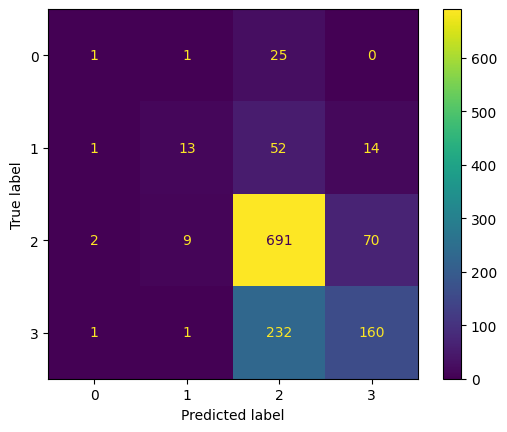

In [41]:
## Choosing Random Forest + Tf-Idf as it has given maximum accuracy
## Changing the tf-idf method to max_features = x

# Text- Reprentation (Vectorization)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
x_tfidf = tfidf.fit_transform(x).toarray()
print(x_tfidf.shape)

# Splitting
from sklearn.model_selection import train_test_split
x_tf_idf_train,x_tf_idf_test,y_tf_idf_train,y_tf_idf_test = train_test_split(x_tfidf,y,test_size=0.2,random_state=42)

# Creating the model
import sklearn.ensemble as ensemble
rf_tfidf = ensemble.RandomForestClassifier()
rf_tfidf.fit(x_tf_idf_train,y_tf_idf_train)
y_pred_tfidf = rf_tfidf.predict(x_tf_idf_test)
print(accuracy_score(y_tf_idf_test,y_pred_tfidf))
ConfusionMatrixDisplay(confusion_matrix(y_tf_idf_test,y_pred_tfidf)).plot()

- In this case, not improved.

### Some Problems that might Happen if we have a large Corpus

|No |Problem|Solution|
|--|---------|--------|
|1.| Memory Issue | max_features = 5000(in CountVectorizer) |


In [42]:
# # Text- Reprentation (Vectorization)
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(ngram_range=(1,100))
# x_n_gram = cv .fit_transform(x).toarray()
# print(x_n_gram.shape)

# # Splitting
# from sklearn.model_selection import train_test_split
# x_n_gram_train,x_n_gram_test,y_n_gram_train,y_n_gram_test = train_test_split(x_n_gram,y,test_size=0.2,random_state=42)

# # Creating the model
# import sklearn.ensemble as ensemble
# rf_n_gram = ensemble.RandomForestClassifier()
# rf_n_gram.fit(x_n_gram_train,y_n_gram_train)
# y_pred_n_gram = rf_n_gram.predict(x_n_gram_test)
# print(accuracy_score(y_n_gram_test,y_pred_n_gram))
# ConfusionMatrixDisplay(confusion_matrix(y_n_gram_test,y_pred_n_gram)).plot()

**Above code has made the system crashed by taking all ram.So, update requried is max_features = ?**

(6364, 5000)
0.6834249803613511


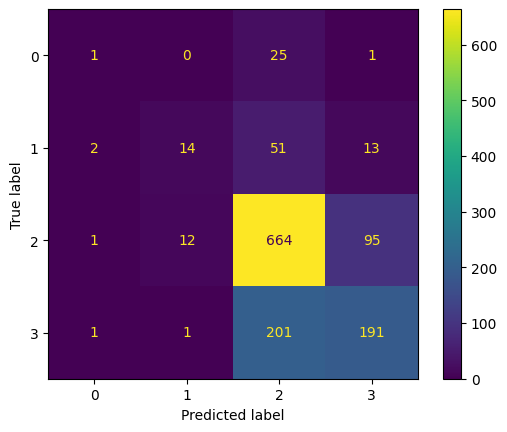

In [43]:
# Text- Reprentation (Vectorization)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,100),max_features=5000)
x_n_gram = cv .fit_transform(x).toarray()
print(x_n_gram.shape)

# Splitting
from sklearn.model_selection import train_test_split
x_n_gram_train,x_n_gram_test,y_n_gram_train,y_n_gram_test = train_test_split(x_n_gram,y,test_size=0.2,random_state=42)

# Creating the model
import sklearn.ensemble as ensemble
rf_n_gram = ensemble.RandomForestClassifier()
rf_n_gram.fit(x_n_gram_train,y_n_gram_train)
y_pred_n_gram = rf_n_gram.predict(x_n_gram_test)
print(accuracy_score(y_n_gram_test,y_pred_n_gram))
ConfusionMatrixDisplay(confusion_matrix(y_n_gram_test,y_pred_n_gram)).plot()

## Word2Vec Text Vectorization Technique

1. Pre-trained gensim
2. Own Training

### Own Training

In [ ]:
data = pd.read_csv('/content/Participants_Data/Train.csv',encoding='utf-8')
data.head()

In [ ]:
##  Lower Casing
data['Product_Description'] = data['Product_Description'].str.lower()

## HTML Tag Removal
import re
def remove_html_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'',text)

data['Product_Description'] = data['Product_Description'].apply(remove_html_tags)

## URL Removal
def remove_url(text):
  pattern = re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'',text)

data['Product_Description'] = data['Product_Description'].apply(remove_url)

##### Puctuations Removal is not done bcz we need to sent_tokenize later for word2vec
# ## Punctuation Removal
# import string
# exclude = string.punctuation
# def remove_punc(text):
#   return text.translate(str.maketrans('','',exclude))

# data['Product_Description'] = data['Product_Description'].apply(remove_punc)

## Stopwords Removal
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def remove_stopwords(text):
  return ' '.join([word for word in text.split() if word not in stop_words])

data['Product_Description'] = data['Product_Description'].apply(remove_stopwords)

## Emoji Replacement
import emoji
def convert_emojis(text):
  return emoji.demojize(text)

data['Product_Description'] = data['Product_Description'].apply(convert_emojis)
data.head()


In [44]:
pip install gensim

In [45]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import word_tokenize,sent_tokenize

In [46]:
corpus = []
for text in data['Product_Description']:
  raw_sent = sent_tokenize(text)
  for sent in raw_sent:
    corpus.append(simple_preprocess(sent))

In [47]:
model = Word2Vec(window=10,min_count=2)
model.build_vocab(corpus)
model.train(corpus,total_examples=model.corpus_count,epochs=model.epochs)

(246875, 380225)

In [48]:
len(model.wv.index_to_key)

4360

In [49]:
def document_vector(doc):
  doc = [word for word in doc.split() if word in model.wv.index_to_key]
  return np.mean(model.wv[doc],axis=0)

In [50]:
document_vector(data['Product_Description'][0])

array([-0.22284487,  0.73983496,  0.14745851,  0.39943424, -0.09985421,
       -0.906163  ,  0.50889486,  1.4402773 , -0.71819675, -0.7725672 ,
       -0.0837539 , -0.93622017, -0.11769511,  0.32661158, -0.00298442,
        0.30631363,  0.49765104, -0.30224976, -0.20952311, -1.7154715 ,
        0.2836653 ,  0.3005508 ,  0.58603597, -0.39487997,  0.1116315 ,
        0.09970091, -0.46075666, -0.4657223 , -0.26642954,  0.45885167,
        0.7531092 , -0.26737726,  0.15820932, -0.7421745 , -0.2893952 ,
        0.4576149 ,  0.5658237 , -0.20993865, -0.01339134, -0.8815535 ,
        0.00933785, -0.46065915, -0.3280623 ,  0.24151976,  0.6593501 ,
       -0.12007301, -0.5941752 , -0.19510606,  0.00442835,  0.346295  ,
       -0.01108214, -0.55986786, -0.46775934,  0.2618229 , -0.25599557,
        0.5417361 ,  0.6714437 , -0.00687471, -0.16334328,  0.39345855,
       -0.03086391,  0.04577348,  0.12088037,  0.29087302, -0.51178575,
        0.8010989 , -0.11680748,  0.3215892 , -0.6804949 ,  0.78

In [51]:
from tqdm import tqdm
x = []
for text in tqdm(data['Product_Description']):
  x.append(document_vector(text))

100%|██████████| 6364/6364 [00:02<00:00, 3003.06it/s]


In [52]:
x = np.array(x)
x.shape

(6364, 100)

In [53]:
y = data['Sentiment']
y.shape

(6364,)

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

0.5695208169677927


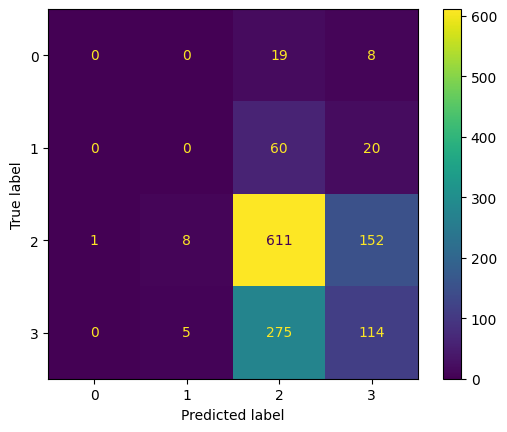

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

### Practical Tips:
1. Ensamble Techniques.
2. Heuristic Features.
3. Do not move to DL directly.
4. Imbalanced Data must not be there.
5. Projects.
